In [110]:
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [111]:
p=Path("dataset-resized")
dirs=p.glob("*")
image_data=[]
labels=[]

image_path=[]  #Optional

label_dict={"cardboard":0,
           "glass":1,
           "metal":2,
           "paper":3,
           "plastic":4,
           "trash":5}
label2gar={0:"cardboard",
               1:"glass",
               2:"metal",
               3:"paper",
               4:"plastic",
               5:"trash"}


for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]
    
    #print(label)
    cnt=0
    #print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        img=image.load_img(img_path,target_size=(40,40))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
        
    print(cnt)

403
501
410
594
482
137


In [112]:
X=np.array(image_data)
X=X/255.0
Y=np.array(labels)
print(X.shape,Y.shape)

(2527, 40, 40, 3) (2527,)


In [113]:
def drw_img(X,label):
    plt.title(label2gar[label])
    plt.axis("off")
    plt.imshow(X)

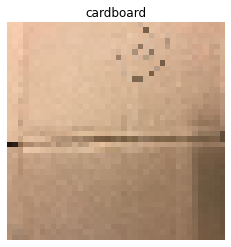

In [114]:
drw_img(X[0],Y[0])

In [115]:
print(Y)
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
print(Y)

[0 0 0 ... 5 5 5]
[3 2 2 ... 5 4 3]


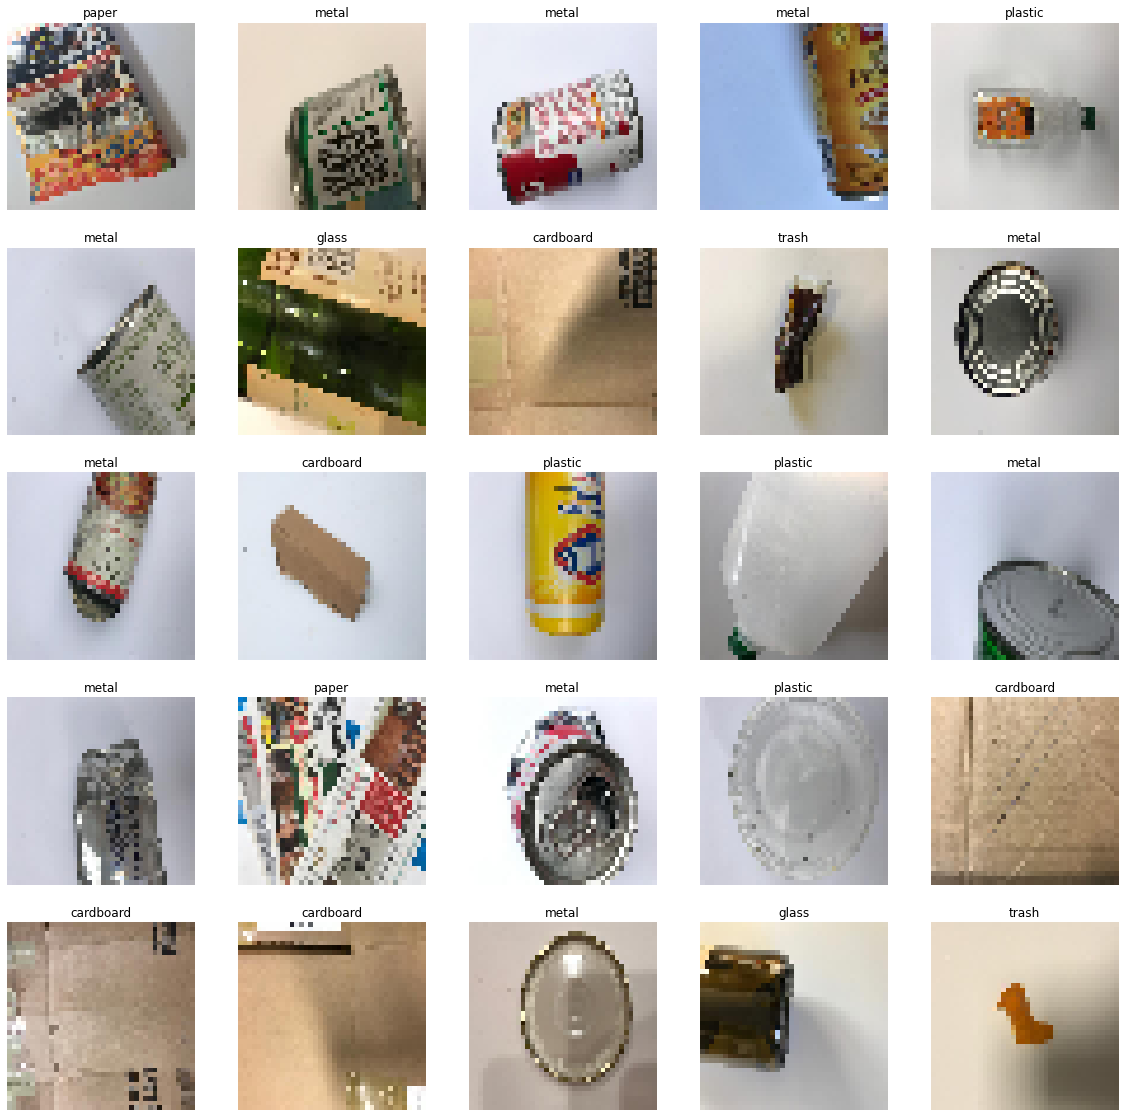

In [116]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    drw_img(X[i],Y[i])

In [117]:
X_=np.array(X)
Y_=np.array(Y)

Y_=np_utils.to_categorical(Y_)
print(X_.shape,Y_.shape)

split=int((0.8)*X_.shape[0])
print(split)

X_train=X_[:split,:]
Y_train=Y_[:split,:]

X_test=X_[split:,:]
Y_test=Y_[split:,:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2527, 40, 40, 3) (2527, 6)
2021
(2021, 40, 40, 3) (2021, 6)
(506, 40, 40, 3) (506, 6)


In [118]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(40,40,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         7

In [119]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
hist=model.fit(
        X_train,
        Y_train,
        epochs=40,
        shuffle=True,
        batch_size=64,
        validation_split=0.20,
)

Epoch 1/40
26/26 [==============================] - 6s 238ms/step - loss: 1.7325 - accuracy: 0.2252 - val_loss: 1.7309 - val_accuracy: 0.2667
Epoch 2/40
26/26 [==============================] - 7s 265ms/step - loss: 1.7321 - accuracy: 0.2252 - val_loss: 1.7304 - val_accuracy: 0.2667
Epoch 3/40
26/26 [==============================] - 7s 258ms/step - loss: 1.7318 - accuracy: 0.2252 - val_loss: 1.7301 - val_accuracy: 0.2667
Epoch 4/40
26/26 [==============================] - 7s 266ms/step - loss: 1.7314 - accuracy: 0.2252 - val_loss: 1.7298 - val_accuracy: 0.2667
Epoch 5/40
26/26 [==============================] - 8s 295ms/step - loss: 1.7311 - accuracy: 0.2252 - val_loss: 1.7297 - val_accuracy: 0.2667
Epoch 6/40
26/26 [==============================] - 8s 299ms/step - loss: 1.7308 - accuracy: 0.2252 - val_loss: 1.7295 - val_accuracy: 0.2667
Epoch 7/40
26/26 [==============================] - 8s 292ms/step - loss: 1.7305 - accuracy: 0.2252 - val_loss: 1.7291 - val_accuracy: 0.2667
Epoch 

In [ ]:
plt.figure(0)
plt.plot(hist.history['loss'],'green')
plt.plot(hist.history['val_loss'],'blue')
plt.plot(hist.history['accuracy'],'red')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [ ]:
Y_pred=model.predict(X_test)
print(Y_pred)
Y_pred=np.argmax(Y_pred,axis=1)  #get max from each row
print(Y_pred)
actual_Y_label=np.argmax(Y_test,axis=1)

class_name=["cardboard","glass","metal","paper","plastic","trash"]
cls_report=classification_report(actual_Y_label,Y_pred,target_names=class_name)
print(cls_report)

In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
cnf_matrix=confusion_matrix(actual_Y_label,Y_pred,labels=[0,1,2,3,4,5])
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix,target_names=class_name,normalize=False)

In [ ]:
for i in range(Y_test.shape[0]):
    if Y_pred[i]!=actual_Y_label[i]:
        print("Predict %s but actual  is %s"%(label2gar[Y_pred[i]],label2gar[actual_Y_label[i]]))
        drw_img(X_test[i].reshape(40,40,3),actual_Y_label[i])

In [ ]:
def predict_image(image_path):
    img=image.load_img(image_path,target_size=(40,40))
    img_array=image.img_to_array(img)
    img_array=np.array(img_array)
    img_array=img_array.reshape(40,40,3)
    prob=model.predict(img_array.reshape(-1,40,40,3))
    prob=np.array(prob)
    print(label2gar[np.argmax(prob)])

In [ ]:
model_json = model.to_json()
with open("modelg.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("modelg.h5")